## Table of Contents

<div style"margin-top: 20px">

1. [Reading the Dataset](#Reading-the-Dataset)
2. [Visualizaing the data using matplotlib](#two) <br>
   a. [Line Plot](#lineplot) <br>
   b. [Bar Plot](#barplot) <br>
   c. [Area Plot](#areaplot) <br>
   d. [Histogram](#histogram) <br>
   e. [Pie Chart](#piechart) <br>
   f. [Box Plot](#boxplot) <br>
   g. [Scatter Plot](#scatterplot) <br>

</div>

## Reading the Dataset <a id='Reading-the-Dataset'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Migration.csv')

In [3]:
df.set_index('Unnamed: 0', inplace=True)
df.index.name = None

In [4]:
years = list(map(str, range(1980, 2014)))
years[:5]

['1980', '1981', '1982', '1983', '1984']

## Visualizing the data using Matplotlib <a id='two'></a>

In [5]:
mpl.__version__

'3.7.2'

In [6]:
plt.style.available
mpl.style.use(['ggplot'])

**What is a line plot and why use it?**

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields.
Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.


In [7]:
haiti = df.loc['Haiti', years]
haiti.index = haiti.index.map(int)

## Line Plot <a id='lineplot'></a>

Text(2003, 6000, '2010 Earthquake')

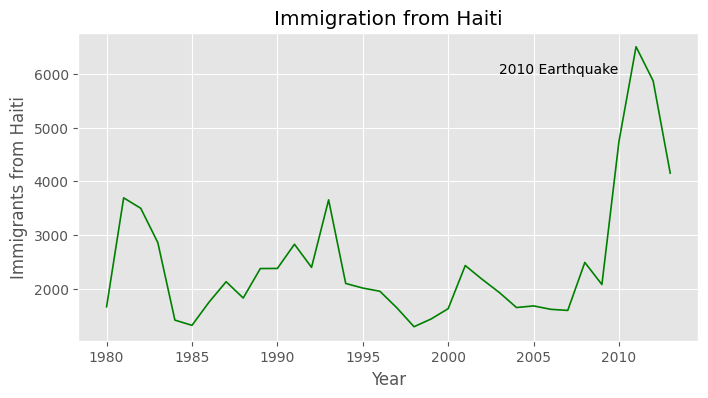

In [8]:
plt.figure(figsize=(8,4))
haiti.plot(kind='line', c='g', lw=1.2)
plt.xlabel("Year")
plt.ylabel("Immigrants from Haiti")
plt.title("Immigration from Haiti")

plt.text(2003, 6000, '2010 Earthquake')

**Let's compare the number of immigrants from India and China from 1980 to 2013.**

In [9]:
ind = df.loc['India',years]
chin = df.loc['China', years]

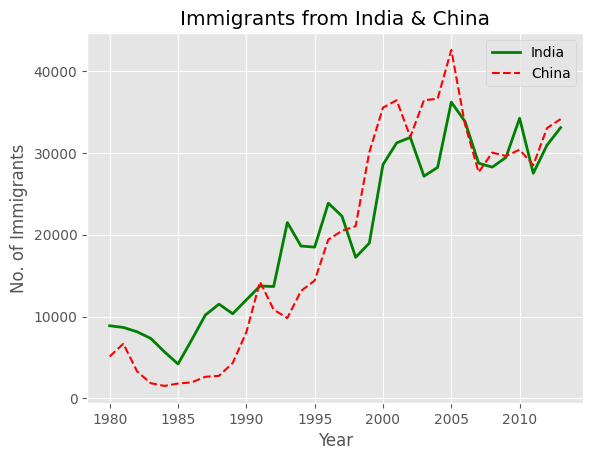

In [24]:
ind.plot(kind='line', lw=2, c='g', label="India")
chin.plot(kind='line', lw=1.5, c='r', label="China", ls='--')
plt.xlabel("Year")
plt.ylabel("No. of Immigrants")
plt.title("Immigrants from India & China")
plt.legend()

In [11]:
top_5 = df.sort_values(by='total', ascending=False).head(5)[years].T

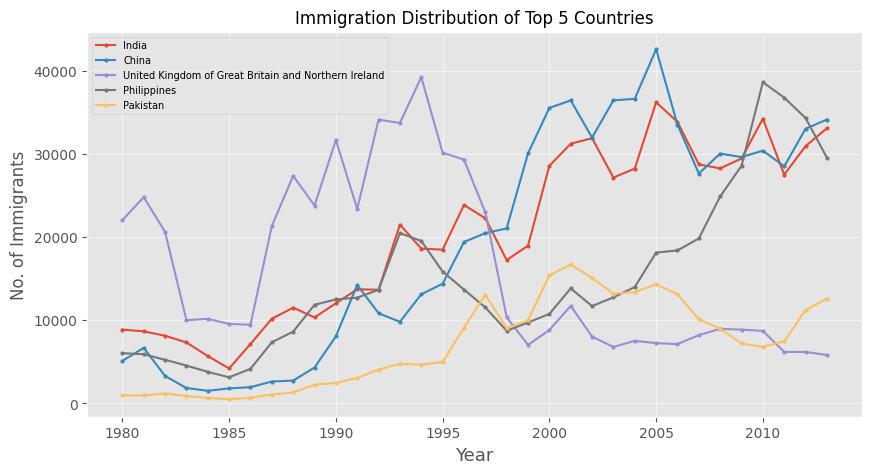

In [47]:
ax = top_5.plot(kind='line',
          figsize=(10,5),
          marker='o',
          markersize=2)

ax.legend(fontsize=7);
ax.set_xlabel("Year", fontsize=13)
ax.set_ylabel("No. of Immigrants", fontsize=12)
ax.set_title("Immigration Distribution of Top 5 Countries", fontsize=12);

ax.grid(alpha=0.6)

## Bar Plot <a id="barplot"></a>

It is mainly used to represent the Frequency Distribution of Categorical or Distinct Variables

<BarContainer object of 2 artists>

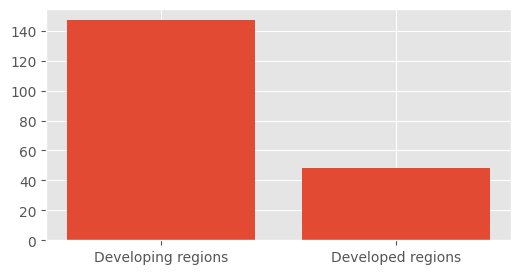

In [13]:
plt.figure(figsize=(6,3))
plt.bar(df['Developed?'].value_counts().index, height=df['Developed?'].value_counts().values)

Text(22.5, 45, '2008-2011 Financial Crisis')

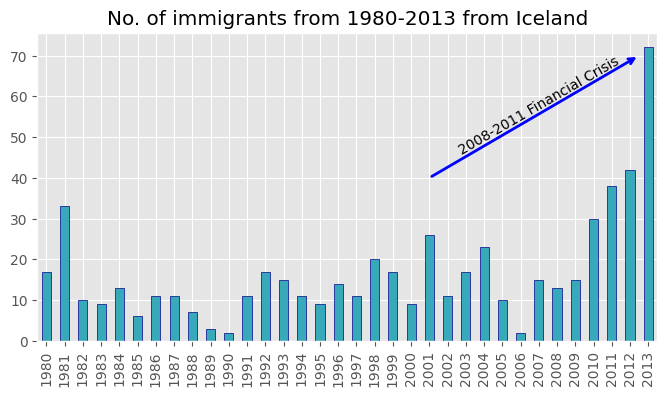

In [50]:
plt.figure(figsize=(8,4))
df.loc['Iceland', years].plot(kind='bar', color='#38a9ba', edgecolor="darkblue");
plt.title("No. of immigrants from 1980-2013 from Iceland");

plt.annotate("",
            xy=(32.5,70),
            xytext=(21,40),
            xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.annotate("2008-2011 Financial Crisis",
            xy=(22.5,45),
            rotation=30,
            va='bottom',
            ha='left')

In [15]:
df2 = df.sort_values(by='total').tail(15)['total']
df2

Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: total, dtype: int64

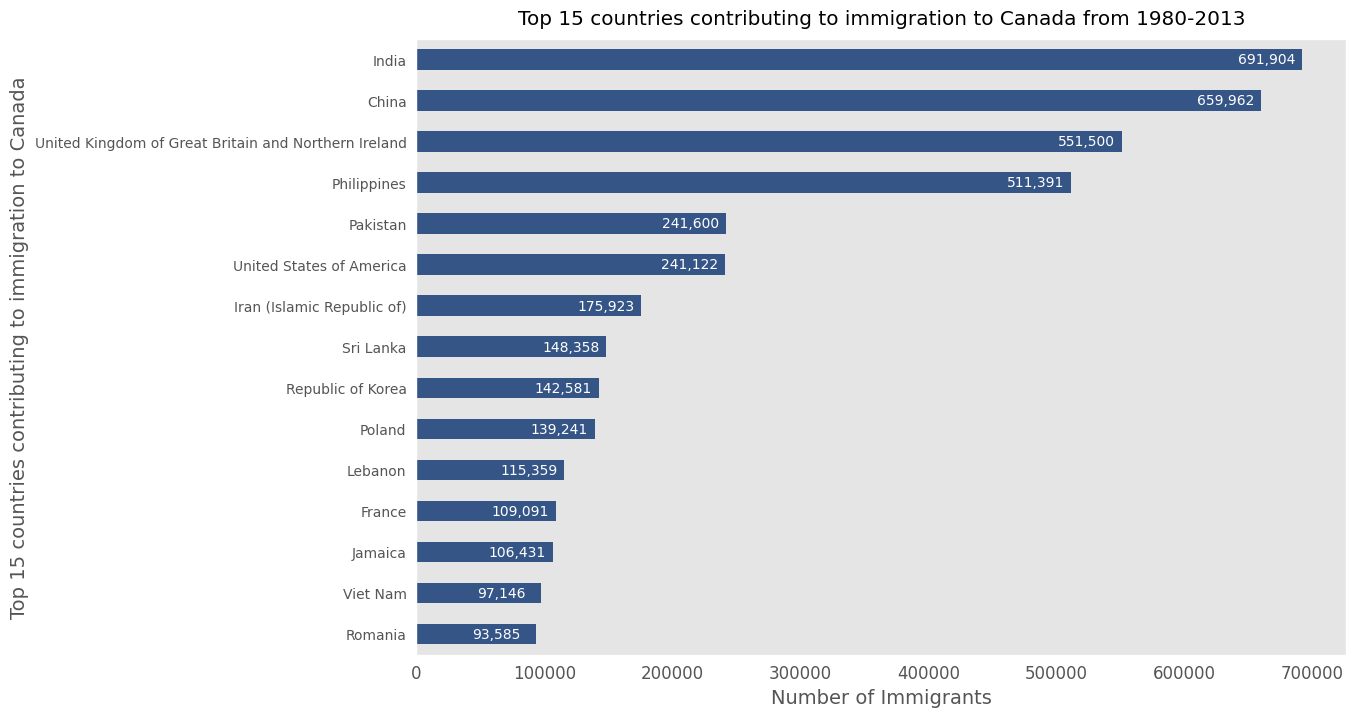

In [74]:
df2.plot(kind='barh',
        figsize=(12,8), color='#365587')

plt.xlabel("Number of Immigrants", fontsize=14)
plt.ylabel("Top 15 countries contributing to immigration to Canada", fontsize=14)
plt.title("Top 15 countries contributing to immigration to Canada from 1980-2013", y=1.01)

for index, value in enumerate(df2):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-50000, index-0.1),
                color='white', fontsize=10)

plt.grid()
plt.tick_params(left=False, bottom=False)
plt.xticks(fontsize=12);
plt.savefig("Hist.png")

## Area Plot <a id="areaplot"></a>

In [17]:
top_5 = top_5.loc[years]

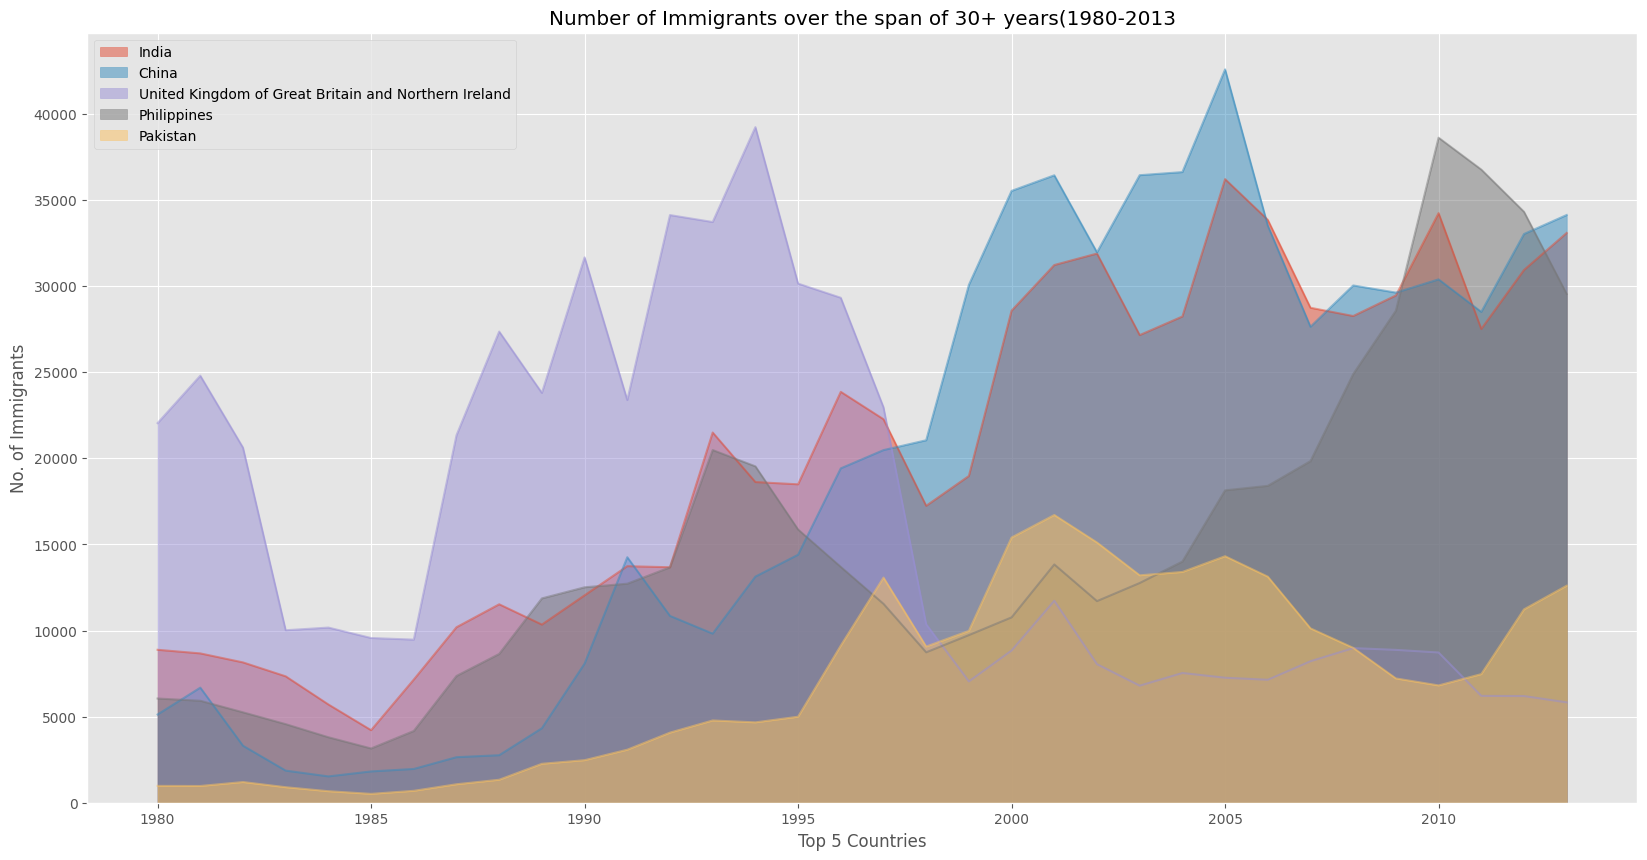

In [18]:
# Top 5 countries that contributed the most to the immigration  

top_5.rename({'United Kingdom of Great Britain and Northern Ireland':'United Kingdom'}, inplace=True)
top_5.plot(kind='area',
           figsize=(20,10),
           stacked=False,
           alpha=0.5);
plt.xlabel('Top 5 Countries')
plt.ylabel('No. of Immigrants')
plt.title('Number of Immigrants over the span of 30+ years(1980-2013');

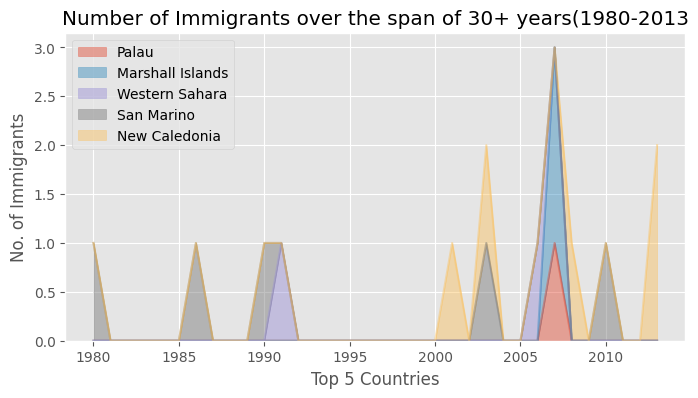

In [19]:
# Top 5 countries that contributed the least to the immigration  
df_least = df.sort_values(by='total').head()
df_least = df_least[years]
df_least=df_least.T
df_least.index = df_least.index.map(int)

df_least.plot(kind='area',
        figsize=(8, 4), 
        alpha=0.45)
plt.xlabel('Top 5 Countries')
plt.ylabel('No. of Immigrants')
plt.title('Number of Immigrants over the span of 30+ years(1980-2013');

## Histogram <a id="histogram"></a>

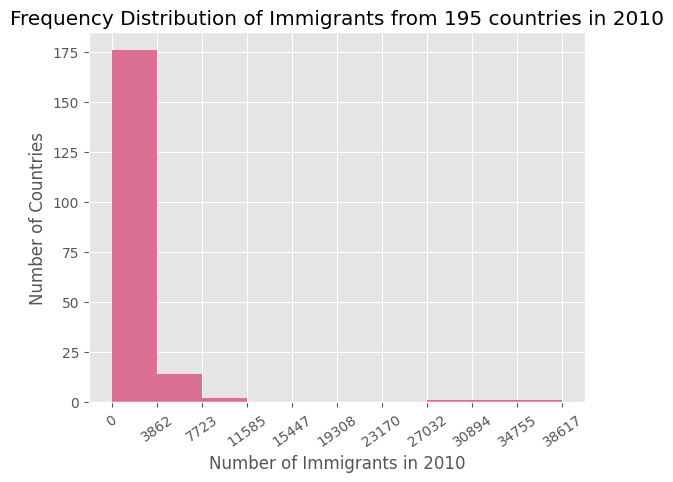

In [20]:
cnt, bin_edges = np.histogram(df['2010'])
df['2010'].plot(kind='hist', xticks=bin_edges, color='palevioletred')
plt.xticks(rotation=35);
plt.xlabel("Number of Immigrants in 2010")
plt.ylabel("Number of Countries")
plt.title("Frequency Distribution of Immigrants from 195 countries in 2010");

<Axes: ylabel='Frequency'>

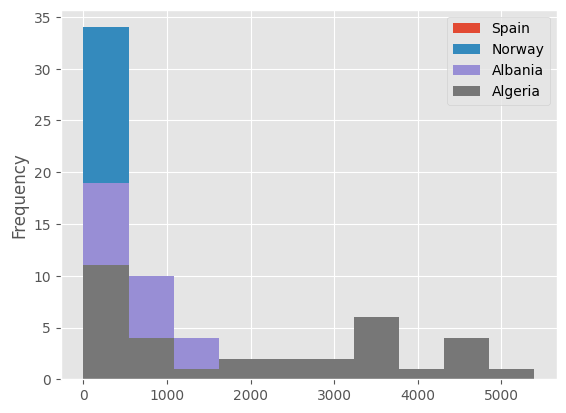

In [21]:
d = df.loc[['Spain','Norway','Albania','Algeria'], years].T
d.index = d.index.map(int)
d.plot(kind='hist',
       stacked=False,
       alpha=1)

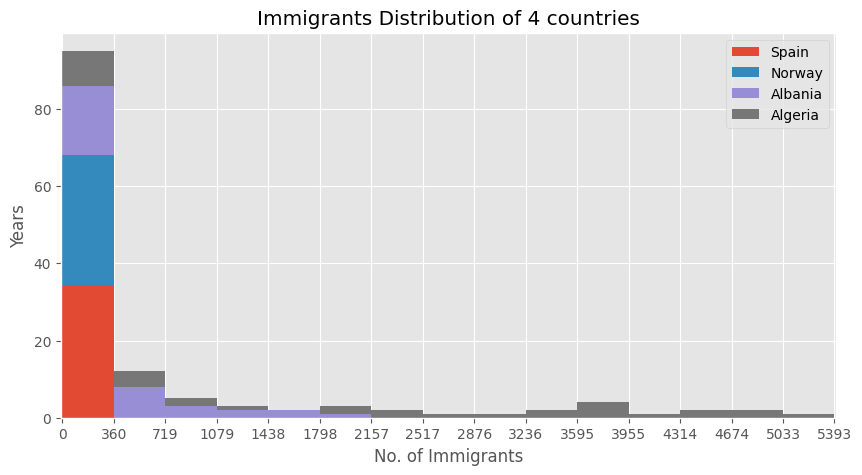

In [22]:
cnt, ticks = np.histogram(d, 15)
xmin = ticks[0] - 10
xmax = ticks[-1] + 10

ax = d.plot(kind='hist',
       stacked=True,
       bins=15,
       xticks=ticks,
       figsize=(10,5),
       xlim = (xmin, xmax))

ax.set_title("Immigrants Distribution of 4 countries")
ax.set_xlabel("No. of Immigrants")
ax.set_ylabel("Years");

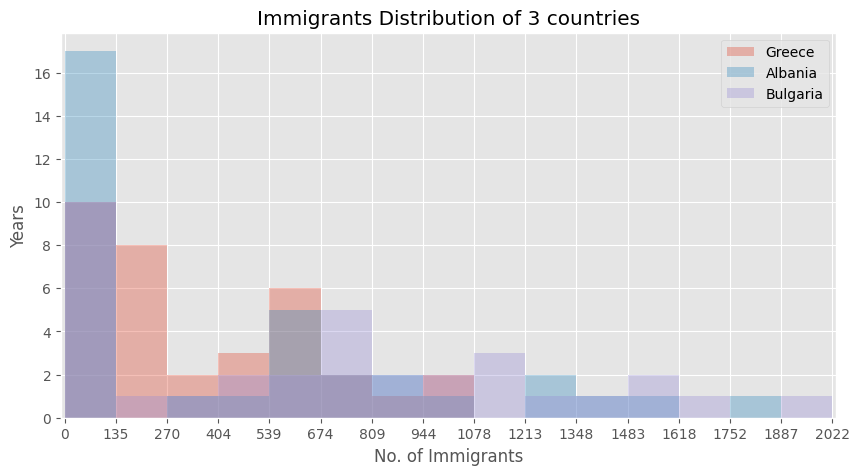

In [23]:
### type your answer here
dfx = df.loc[['Greece','Albania','Bulgaria'], years].T
cnt, bin_edges = np.histogram(dfx, 15)
min = bin_edges[0] - 10
max = bin_edges[-1] + 10

ax = dfx.plot(kind='hist',
        alpha=0.35,
        xlim=(min, max),
        bins=15,
        xticks=bin_edges,
        figsize=(10,5))
ax.set_title("Immigrants Distribution of 3 countries")
ax.set_xlabel("No. of Immigrants")
ax.set_ylabel("Years");

### Other Plots

* `barh` for horizontal bar plotaot
* `kde` or `density` for density ppllots
* `scatter` for scatter plots
* `hexbin` for hexbin plot

**Seaborn provides more refined version of these plots. So, In seaborn we'll learn about these plots.**

## Thank you